# LDA

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install spacy gensim pandas matplotlib seaborn pyLDAvis
!python -m spacy download en_core_web_trf

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
import en_core_web_trf
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

In [ ]:
data = pd.read_json('/content/semeval-task2-homo.json', orient='records')
data.head()

,sentence,pun_word
0,They hid from the gunman in a sauna where they...,sweat
1,Wal - Mart isn ' t the only saving place !,saving
2,Can honeybee abuse lead to a sting operation ?,sting
3,A ditch digger was entrenched in his career .,entrenched
4,"She was only a Blacksmith ' s daughter , but s...",forge


In [ ]:
nlp = en_core_web_trf.load()

# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []

In [ ]:
for sent in nlp.pipe(data['sentence']):
   proj_tok = [token.lemma_.lower() for token in sent if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

# Add tokens to new column
data['tokens'] = tokens
data['tokens']

0                    [hide, gunman, sauna, sweat]
1                   [wal, mart, isn, save, place]
2       [honeybee, abuse, lead, sting, operation]
3               [ditch, digger, entrench, career]
4             [blacksmith, daughter, know, forge]
                          ...                    
1602           [old, sanitation, man, die, waste]
1603           [electrician, pass, battery, test]
1604                  [old, musicians, die, play]
1605           [burn, candle, end, bright, think]
1606         [student, limp, class, lame, excuse]
Name: tokens, Length: 1607, dtype: object

In [ ]:
dictionary = Dictionary(data['tokens'])
print(dictionary.token2id)

# Filter dictionary
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

{'gunman': 0, 'hide': 1, 'sauna': 2, 'sweat': 3, 'isn': 4, 'mart': 5, 'place': 6, 'save': 7, 'wal': 8, 'abuse': 9, 'honeybee': 10, 'lead': 11, 'operation': 12, 'sting': 13, 'career': 14, 'digger': 15, 'ditch': 16, 'entrench': 17, 'blacksmith': 18, 'daughter': 19, 'forge': 20, 'know': 21, 'hear': 22, 'hit': 23, 'huge': 24, 'new': 25, 'pinata': 26, 's': 27, 'bank': 28, 'high': 29, 'jumper': 30, 'manager': 31, 'spend': 32, 'time': 33, 'vault': 34, 'deep': 35, 'dig': 36, 'discussion': 37, 'shaft': 38, 'brooch': 39, 'couldn': 40, 'pin': 41, 'steal': 42, 'suspect': 43, 'cream': 44, 'ice': 45, 'invent': 46, 'lick': 47, 'problem': 48, 'admit': 49, 'room': 50, 'tom': 51, 'inventor': 52, 'party': 53, 'throw': 54, 'toast': 55, 'toaster': 56, 'gardener': 57, 'plant': 58, 'advanced': 59, 'class': 60, 'geometry': 61, 'square': 62, 'change': 63, 'easter': 64, 'grave': 65, 'happy': 66, 'jesus': 67, 'situation': 68, 'angry': 69, 'battery': 70, 'cell': 71, 'counselor': 72, 'die': 73, 'find': 74, 'get': 

In [ ]:
# Create corpus
corpus = [dictionary.doc2bow(doc) for doc in data['tokens']]

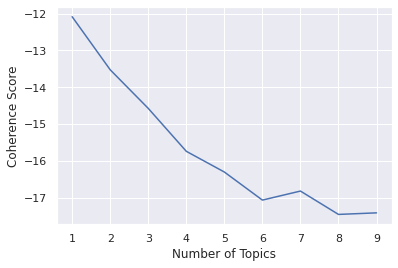

In [ ]:
# Coherence score using C_umass:
topics = []
score = []
for i in range(1,10,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

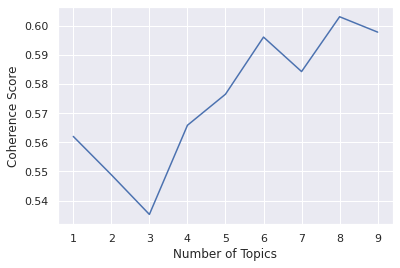

In [ ]:
# Coherence score using C_v:
topics = []
score = []
for i in range(1,10,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = data['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [ ]:
topics = 6

In [ ]:
# Optimal model
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=topics, workers = 4, passes=100)

# Print topics
lda_model.print_topics(-1)

[(0,
  '0.050*"s" + 0.043*"good" + 0.031*"time" + 0.030*"tell" + 0.026*"think" + 0.022*"didn" + 0.022*"say" + 0.020*"company" + 0.020*"tom" + 0.018*"know"'),
 (1,
  '0.063*"tom" + 0.054*"find" + 0.040*"like" + 0.039*"say" + 0.027*"math" + 0.025*"high" + 0.025*"problem" + 0.023*"teacher" + 0.020*"stop" + 0.018*"electrician"'),
 (2,
  '0.059*"work" + 0.049*"new" + 0.039*"man" + 0.031*"store" + 0.031*"hear" + 0.026*"job" + 0.026*"call" + 0.022*"lot" + 0.022*"come" + 0.022*"ask"'),
 (3,
  '0.071*"go" + 0.070*"m" + 0.054*"daughter" + 0.051*"get" + 0.038*"doctor" + 0.036*"know" + 0.033*"want" + 0.019*"buy" + 0.019*"take" + 0.019*"fire"'),
 (4,
  '0.064*"people" + 0.023*"baseball" + 0.021*"player" + 0.021*"run" + 0.020*"feel" + 0.020*"cut" + 0.020*"break" + 0.018*"play" + 0.017*"decide" + 0.017*"draw"'),
 (5,
  '0.261*"old" + 0.256*"die" + 0.062*"lose" + 0.022*"try" + 0.015*"dentist" + 0.015*"class" + 0.014*"player" + 0.013*"invent" + 0.013*"retire" + 0.010*"hang"')]

In [ ]:
# Where does a text belong to
print(lda_model[corpus][0])
print(data['sentence'][0])

[(0, 0.16666667), (1, 0.16666667), (2, 0.16666667), (3, 0.16666667), (4, 0.16666667), (5, 0.16666667)]
They hid from the gunman in a sauna where they could sweat it out .


In [ ]:
# Visualize topics
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

# NMF

In [ ]:
import pandas as pd
import numpy as np
import en_core_web_trf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [ ]:
data = pd.read_json('/content/semeval-task2-homo.json', orient='records')
data.head()

,sentence,pun_word
0,They hid from the gunman in a sauna where they...,sweat
1,Wal - Mart isn ' t the only saving place !,saving
2,Can honeybee abuse lead to a sting operation ?,sting
3,A ditch digger was entrenched in his career .,entrenched
4,"She was only a Blacksmith ' s daughter , but s...",forge


In [ ]:
nlp = en_core_web_trf.load()

# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []

In [ ]:
for sent in nlp.pipe(data['sentence']):
   proj_tok = [token.lemma_.lower() for token in sent if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)
data['tokens'] = tokens

In [ ]:
texts = data['tokens']
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)
X = tfidf_vectorizer.fit_transform(texts)
words = np.array(tfidf_vectorizer.get_feature_names())

print(X[:10])
print("X = ", words[:10])

  (1, 537)	0.5710819350790691
  (1, 611)	0.5592349092217055
  (1, 370)	0.6009340560611761
  (2, 495)	0.6955565555515314
  (2, 393)	0.7184713480921069
  (3, 95)	0.6955565555515314
  (3, 200)	0.7184713480921069
  (4, 169)	0.6840581156909268
  (4, 385)	0.5205263137348599
  (4, 167)	0.5109959403625209
  (5, 333)	0.5163773594729679
  (5, 339)	0.44171554502808597
  (5, 352)	0.5163773594729679
  (5, 468)	0.3521876786451451
  (5, 332)	0.3841354728979549
  (6, 736)	0.3456569478252384
  (6, 663)	0.5039086538139865
  (6, 338)	0.404062943952243
  (6, 431)	0.47470565575048423
  (6, 34)	0.4878370842347528
  (7, 177)	0.5421346791296069
  (7, 196)	0.5248439357557824
  (7, 199)	0.5421346791296069
  (7, 468)	0.3697550844416564
  (8, 531)	0.5646822122371478
  (8, 148)	0.40205980295431715
  (8, 681)	0.447901678065909
  (8, 707)	0.5646822122371478
  (9, 357)	0.4846247525235888
  (9, 561)	0.3844007039421875
  (9, 365)	0.4029826032345328
  (9, 157)	0.4846247525235888
  (9, 356)	0.46916822013215087
X =  ['acc

In [ ]:
# Applying Non-Negative Matrix Factorization
 
nmf = NMF(n_components=10, solver="mu")
W = nmf.fit_transform(X)
H = nmf.components_

for i, topic in enumerate(H):
     print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in words[topic.argsort()[-10:]]])))

Topic 1: die steal,worker,player,boot,end,retire,player die,die retire,old,die
Topic 2: lie,wind,reply,snap,ll,take,want,ve,say tom,tom
Topic 3: couldn,daughter go,love,daughter love,town,man,calf,daughter know,know,daughter
Topic 4: drive,spirit,figure,electricians,electricians die,old electricians,faculty,lose faculty,die lose,lose
Topic 5: man,day,office,try,class,come,job,factory,find,work
Topic 6: bad,dentist,go buy,business,start,book,daughter go,run,buy,go
Topic 7: start,ve get,big,time,doctor,think,ve,job,new,get
Topic 8: watch,change,time,like,ask,find,don,man,say tom,say
Topic 9: cause,tell,day,town,credit,invent,people like,lot,like,people
Topic 10: couldn,hear,thing,turn,give,think,lot,didn,want,good


# Vector Distance

> Lower means closer

## Word2Vec w/ Word Movers Distance

In [ ]:
import gensim
import gensim.downloader as api
from gensim.utils import simple_preprocess

In [ ]:
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
s1 = "If the opposite of pro is con, isn't the opposite of progress, congress?"
s2_list = ['politics', 'animals', 'people', 'sports']

In [ ]:
for s2 in s2_list:
  distance = wv.wmdistance(s1, s2)
  print ('distance = %.3f' % distance)

distance = 1.198
distance = 1.961
distance = 1.867
distance = 1.198


In [ ]:
def tidy_sentence(sentence, vocabulary):
    return [word for word in simple_preprocess(sentence) if word in vocabulary]

def compute_sentence_similarity(sentence_1, sentence_2, model_wv):
    vocabulary = set(model_wv.index2word)    
    tokens_1 = tidy_sentence(sentence_1, vocabulary)    
    tokens_2 = tidy_sentence(sentence_2, vocabulary)    
    return model_wv.n_similarity(tokens_1, tokens_2)

In [ ]:
for s2 in s2_list:
  distance = compute_sentence_similarity(s1, s2, wv)
  print('distance = %.3f' % distance)

distance = 0.277
distance = 0.050
distance = 0.239
distance = 0.170


## Glove with Sentence2Vec and Cosine Distance

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2022-12-07 16:49:34--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-12-07 16:49:34--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-12-07 16:49:35--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
import numpy as np
from typing import List
import math


# word.lower() => frequency int
word_frequency = dict()
avg_frequency = 1.0
with open('word-frequency-list.txt', 'rt') as reader:
    max_value = 0.0
    counter = 0
    for line in reader:
        line = line.strip().split(' ')
        if len(line) == 2:
            value = math.log2(float(line[1]))
            avg_frequency += value
            counter += 1
            word_frequency[line[0].lower()] = value
    avg_frequency /= counter


# an embedding word with associated vector
class Word:
    def __init__(self, text, vector):
        self.text = text
        self.vector = vector

    def __str__(self):
        return self.text + ' : ' + str(self.vector)

    def __repr__(self):
        return self.__str__()


# a sentence, a list of words
class Sentence:
    def __init__(self, word_list):
        self.word_list = word_list

    # return the length of a sentence
    def len(self) -> int:
        return len(self.word_list)

    def __str__(self):
        word_str_list = [word.text for word in self.word_list]
        return ' '.join(word_str_list)

    def __repr__(self):
        return self.__str__()


# return a typical frequency for a word from Google's n-grams
def get_word_frequency(word_text):
    if word_text.lower() in word_frequency:
        return word_frequency[word_text.lower()]
    else:
        return avg_frequency


# convert a list of sentence with glove vectors into a set of sentence vectors
def sentence_to_vec(sentence_list: List[Sentence], embedding_size: int):
    if len(sentence_list) == 0:
        return []
    sentence_set = []
    delta = 0.001  # small value to avoid division by 0
    for sentence in sentence_list:
        vs = np.zeros(embedding_size)  # add all glove values into one vector for the sentence
        sentence_length = 0.0
        for word in sentence.word_list:
            # basically the importance of a word becomes less the more frequent it is
            a_value = delta / (delta + get_word_frequency(word.text))  # smooth inverse frequency, SIF
            sentence_length += a_value
            vs = np.add(vs, np.multiply(a_value, word.vector))  # vs += sif * word_vector

        if sentence_length != 0.0:
            vs = np.divide(vs, sentence_length)  # weighted average
        sentence_set.append(vs)  # add to our existing re-calculated set of sentences

    return sentence_set

In [ ]:
import math

# inner product of two vectors
def inner_product(v1, v2):
    if len(v1) == len(v2):
        sum = 0.0
        size_v1 = 0.0
        size_v2 = 0.0
        for i in range(len(v1)):
            size_v1 += v1[i] * v1[i]
            size_v2 += v2[i] * v2[i]
            sum += v1[i] * v2[i]
        size_v1 = math.sqrt(size_v1)
        size_v2 = math.sqrt(size_v2)
        size_mult = size_v1 * size_v2
        if size_mult != 0.0:
            return round(sum / size_mult, 4)
    return 0.0


glove_file = 'glove.6B.300d.txt'
embedding_size = 300   # dimension of glove, must match glove_file size (50 = 50d, 100 = 100d, etc)

# load the glove set from file
glove_300_dict = dict()
with open(glove_file, 'rt') as reader:
    for line in reader:
        line = line.strip().split(' ')
        if len(line) == (embedding_size + 1):
            word = line[0]
            vector = [float(item) for item in line[1:]]
            glove_300_dict[word] = vector

In [ ]:
# load some simple sentences for testing similarities between
sentences = [
    "If the opposite of pro is con, isn't the opposite of progress, congress ?"
]

# convert the above sentences to vectors using spacy's large model vectors
sentence_list = []
for sentence in sentences:
    word_list = []
    for word in sentence.split(' '):
        if word.lower() in glove_300_dict:  # ignore OOVs
            word_list.append(Word(word, glove_300_dict[word.lower()]))
    if len(word_list) > 0:  # did we find any words (not an empty set)
        sentence_list.append(Sentence(word_list))

# apply single sentence word embedding
sentence_vector_lookup = dict()
sentence_vectors = sentence_to_vec(sentence_list, embedding_size)  # all vectors converted together
if len(sentence_vectors) == len(sentence_list):
    for i in range(len(sentence_vectors)):
        # map: text of the sentence -> vector
        sentence_vector_lookup[sentence_list[i]] = sentence_vectors[i]

match_list = ['politics', 'animals', 'people', 'sports']
# go through each sentence and compare it with each other sentence and find the best match
for word in match_list:
    best_match = ''
    best_score = 0.0
    for text2, vector2 in sentence_vector_lookup.items():
        match = inner_product(vector2, glove_300_dict[word.lower()])
        if match > best_score:
            best_score = match
            best_match = text2
    print("best match \"{}\" => \"{}\" (score {})".format(word, best_match, str(best_score)))

best match "politics" => "If the opposite of pro is the opposite of congress ?" (score 0.4419)
best match "animals" => "If the opposite of pro is the opposite of congress ?" (score 0.2775)
best match "people" => "If the opposite of pro is the opposite of congress ?" (score 0.5778)
best match "sports" => "If the opposite of pro is the opposite of congress ?" (score 0.3227)


# BERTopic

In [ ]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 7.2 MB/s 
     |████████████████████████████████| 85 kB 6.3 MB/s 
     |████████████████████████████████| 662 kB 64.3 MB/s 
     |████████████████████████████████| 88 kB 5.5 MB/s 
     |████████████████████████████████| 5.2 MB 22.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 50.7 MB/s 
     |████████████████████████████████| 1.1 MB 38.7 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700839 sha256=1d22bf39e3724704e14b934c5e0368e3f0a1a40c6e5241655ec32ffd7f7bfa47
  Stored in directory: /root/.cache/pip/wheels/76/06/48/527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=1

In [ ]:
# Data processing
import pandas as pd
import numpy as np
# Text preprocessiong
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
# Topic model
from bertopic import BERTopic
# Dimension reduction
from umap import UMAP

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data = pd.read_json('/content/semeval-task2-homo.json', orient='records')
data = data.drop('pun_word', axis=1);
data.head()

,sentence
0,They hid from the gunman in a sauna where they...
1,Wal - Mart isn ' t the only saving place !
2,Can honeybee abuse lead to a sting operation ?
3,A ditch digger was entrenched in his career .
4,"She was only a Blacksmith ' s daughter , but s..."


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
# Remove stopwords
data['sent_without_stopwords'] = data['sentence'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))
# Lemmatization
data['sent_lemmatized'] = data['sent_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))
# Take a look at the data
data.head()

,sentence,sent_without_stopwords,sent_lemmatized
0,They hid from the gunman in a sauna where they...,hid gunman sauna could sweat .,hid gunman sauna could sweat .
1,Wal - Mart isn ' t the only saving place !,Wal - Mart ' saving place !,Wal - Mart ' saving place !
2,Can honeybee abuse lead to a sting operation ?,honeybee abuse lead sting operation ?,honeybee abuse lead sting operation ?
3,A ditch digger was entrenched in his career .,ditch digger entrenched career .,ditch digger entrenched career .
4,"She was only a Blacksmith ' s daughter , but s...","Blacksmith ' daughter , knew forge ahead .","Blacksmith ' daughter , knew forge ahead ."


In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(data['sent_lemmatized'])

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,556,-1_people_name_get_new
1,0,171,0_die_never_old_lose
2,1,70,1_baseball_player_ball_golfer
3,2,62,2_tom_said_remarked_entranced
4,3,47,3_math_teacher_number_class
5,4,42,4_dentist_drill_dentists_cavity
6,5,41,5_restaurant_waiter_soup_chef
7,6,40,6_egg_dog_pet_duck
8,7,40,7_musician_music_composer_guitarist
9,8,37,8_doctor_next_surgeon_circulation


In [ ]:
topic_model.visualize_barchart(top_n_topics=30)

In [ ]:
topic_model.visualize_term_rank()

In [ ]:
topic_model.visualize_topics()

In [ ]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]
# Save the predictions in the dataframe
data['topic_prediction'] = topic_prediction
# Take a look at the data
data.head()

,sentence,sent_without_stopwords,sent_lemmatized,topic_prediction
0,They hid from the gunman in a sauna where they...,hid gunman sauna could sweat .,hid gunman sauna could sweat .,-1
1,Wal - Mart isn ' t the only saving place !,Wal - Mart ' saving place !,Wal - Mart ' saving place !,13
2,Can honeybee abuse lead to a sting operation ?,honeybee abuse lead sting operation ?,honeybee abuse lead sting operation ?,-1
3,A ditch digger was entrenched in his career .,ditch digger entrenched career .,ditch digger entrenched career .,-1
4,"She was only a Blacksmith ' s daughter , but s...","Blacksmith ' daughter , knew forge ahead .","Blacksmith ' daughter , knew forge ahead .",16


In [ ]:
 " ".join([x[0] for x in topic_model.get_topic(13)[:5]])

'store wrapped folded holiday deal'